In [6]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Reading the data 
customers = pd.read_csv('customers.csv')
customers = customers.drop(columns = 'ID', axis = 1)
customers.head()

,Visit_Time,Average_Expense,Sex,Age
0,3,5.7,0,10
1,5,14.5,0,27
2,16,33.5,0,32
3,5,15.9,0,30
4,16,24.9,0,23


In [7]:
pca_md = Pipeline([('stand', MinMaxScaler()),
                   ('pca', PCA())]).fit(customers)

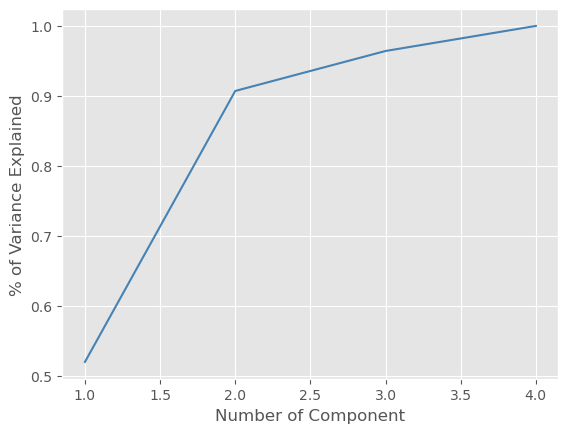

In [10]:
sns.lineplot(x = [1, 2, 3, 4], y = np.cumsum(pca_md['pca'].explained_variance_ratio_), color = 'steelblue')
plt.xlabel('Number of Component')
plt.ylabel('% of Variance Explained');

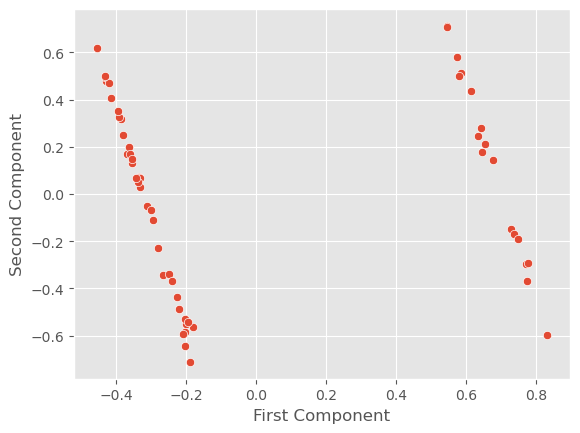

In [20]:
pca_md = Pipeline([('stand', MinMaxScaler()),
                   ('pca', PCA(n_components = 2))]).fit(customers)

pcas = pca_md.transform(customers)

sns.scatterplot(x = pcas[:, 0], y = pcas[:, 1])
plt.xlabel('First Component')
plt.ylabel('Second Component');

In [25]:
kmeans_md = KMeans(n_clusters = 2, n_init = 20, random_state = 42).fit(pcas)
customers['cluster'] = kmeans_md.labels_
customers.head()

,Visit_Time,Average_Expense,Sex,Age,cluster
0,3,5.7,0,10,1
1,5,14.5,0,27,1
2,16,33.5,0,32,1
3,5,15.9,0,30,1
4,16,24.9,0,23,1


In [28]:
cluster_0 = customers[customers['cluster'] == 0].reset_index(drop = True)
cluster_0.describe()

,Visit_Time,Average_Expense,Sex,Age,cluster
count,41.000000,41.000000,41.0,41.000000,41.0
mean,8.170732,16.560976,1.0,21.609756,0.0
std,4.230263,8.430892,0.0,9.964633,0.0
min,1.000000,4.500000,1.0,8.000000,0.0
25%,5.000000,10.600000,1.0,15.000000,0.0
50%,8.000000,15.100000,1.0,20.000000,0.0
75%,11.000000,24.900000,1.0,26.000000,0.0
max,18.000000,33.700000,1.0,47.000000,0.0


In [29]:
cluster_1 = customers[customers['cluster'] == 1].reset_index(drop = True)
cluster_1.describe()

,Visit_Time,Average_Expense,Sex,Age,cluster
count,19.000000,19.000000,19.0,19.000000,19.0
mean,8.894737,18.131579,0.0,21.052632,1.0
std,5.097873,8.454522,0.0,7.856163,0.0
min,3.000000,4.600000,0.0,9.000000,1.0
25%,4.500000,13.250000,0.0,15.500000,1.0
50%,7.000000,17.400000,0.0,21.000000,1.0
75%,14.000000,24.350000,0.0,27.000000,1.0
max,17.000000,33.500000,0.0,33.000000,1.0
